In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Today, we'll be looking at Seaborn, a Python visualization library based on matplotlib.

Seaborn is really just a wraparound matplotlib. It adds styles to make default data visualizations much more visually appealing and makes creation of specific types of complicated plots much simpler.

To get us started, I've imported seaborn as sns.

now, let's set the seed for the random number generator. Which lets us reproduce the data.

In [12]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

Now let's see what the histograms of these two variables look like when we plot them side by side.

We can set alpha equal to 0.7 so the histograms don't cover one another up.

For the bin parameter, instead of integer denoting the number of bins we want we can also pass in a specific sequence using np.arange to specify the specific bins we want to use.
We also add labels so we can see which histogram belongs to which variable using a legend.

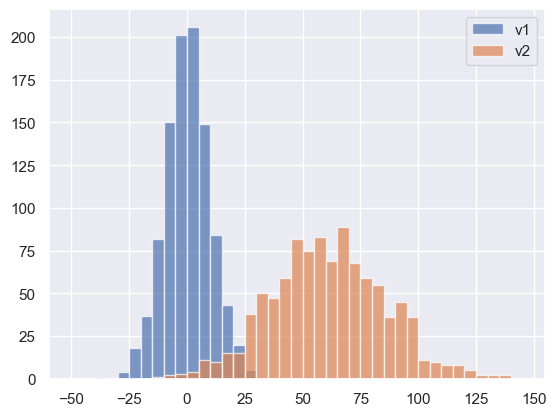

In [13]:
plt.figure()
plt.hist(v1, alpha=0.7,bins= np.arange(-50,150,5), label='v1')
plt.hist(v2, alpha=0.7,bins= np.arange(-50,150,5), label='v2')
plt.legend();
sns.set()

Looking at the histograms we can quickly see that v1 has a lower mean than v2, and that v2 has a larger spread than v1.

Even though up to this point we've only used matplotlib for plotting we see that even importing Seaborn has changed the aesthetics of the plot to a different style from the matplotlib default.

Let's visualize these histograms again but in a different way.

First, let's pass in both of the series v1 and v2 in a list. And set the histtype to barstacked.

Setting normed to True will normalize the histogram to form a probability density.

Next, let's create a variable v3, which is the combination of v1 and v2.

We'll use v3 to plot a kernel density estimate plot over the stacked histogram. The kernel density estimation plot estimates the probability density function of the variable v3. Plotting it on top of the stacked histograms of v1 and v2 allows us to see the relationship between these two visualizations.

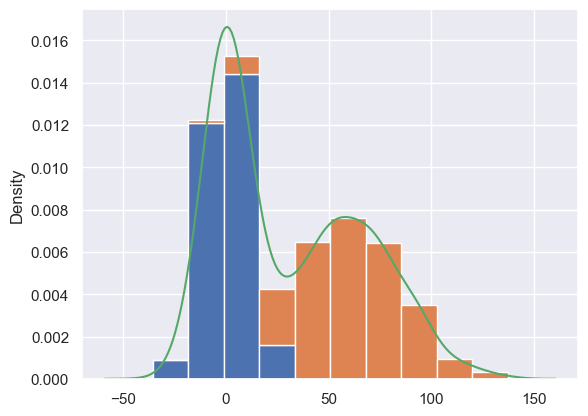

In [20]:
# plot a kernel sensity estimation over a stacked barchart
plt.figure()
plt.hist([v1,v2],histtype='barstacked',density=True);
v3 = np.concat((v1,v2))
sns.kdeplot(v3);

Seaborn provides a convenient function for these type of plots sns.histplot. Let's take a look at how it works.

We can pass in the variable we want to visualize along with keyword arguments for each of the individual components of the plot. Let's set the histogram color to teal and the KDE color to navy.

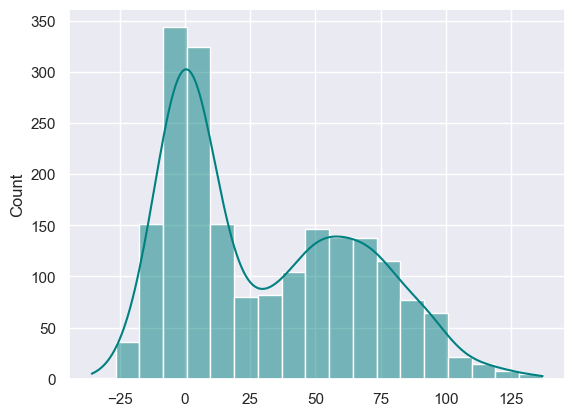

In [29]:
plt.figure()

sns.histplot(v3,color='Teal',kde=True);

Now let's look at an example of one of the types of complex plots that Seborn provides a convenient interface for, the joint plot.

The jointplot creates a scatterplot along the histograms for each individual variable on each axis.

You've actually seen jointplots in module two and created them manually yourself.

To create a jointplot, we just type sns.jointplot and pass in the two series, v1 and v2.

Setting alpha to 0.4 will help with visualizing overlapping points. The jointplot allows us to visualize the distribution of the two variables individually. As well as relationships between the variables. Using jointplot we can see that v1 and v2 appear to be normally distributed variables that are positively correlated. Because Seaborn uses matplotlib we can tweak the plots using Matplotlib's tools.

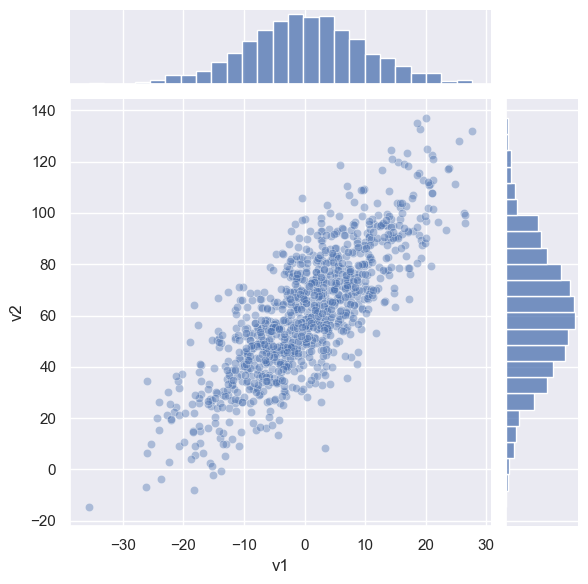

In [34]:
sns.jointplot(x=v1,y=v2,alpha=0.4);

Some of the plotting functions in Seaborn return a matplotlib axis object. While others operate on an entire figure and produce plots with several panels, returning a Seaborn grid object.

In both cases, matplotlib can be used to further tweak the plots. For example, sns.jointplot returns a Seaborn grid object.

From this we can plot a map plot axis subplot object using grid.ax_joint.

Then, we can set the aspect ratio to be equal, using set_aspect equal.

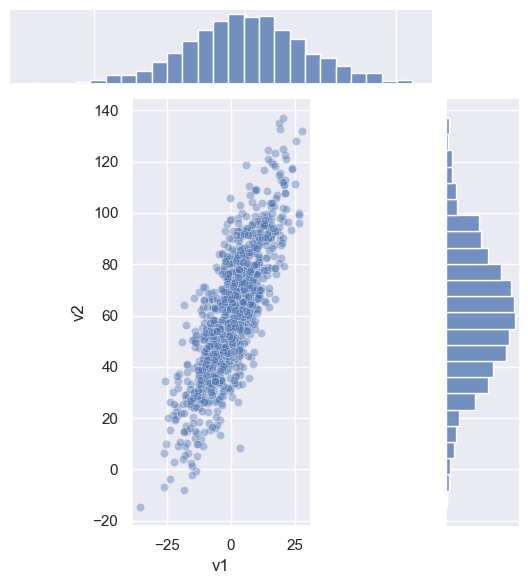

In [36]:
grid = sns.jointplot(x=v1,y=v2,alpha=0.4);
grid.ax_joint.set_aspect('equal')

Hexbin plots are the bivariate counterpart to histograms. Hexbin plots show the number of observations that fall within hexagonal bins.
Sns joint plot includes the hex bin style we can use by passing in hex to the kind parameter.

The hexbin style of plot works well with relatively large data sets. Another good option for visualizing the distribution of data sets is kernel density estimations or KDE plots. You can think of two dimensional KDE plots as the continuous version of the hexbin jointplot.

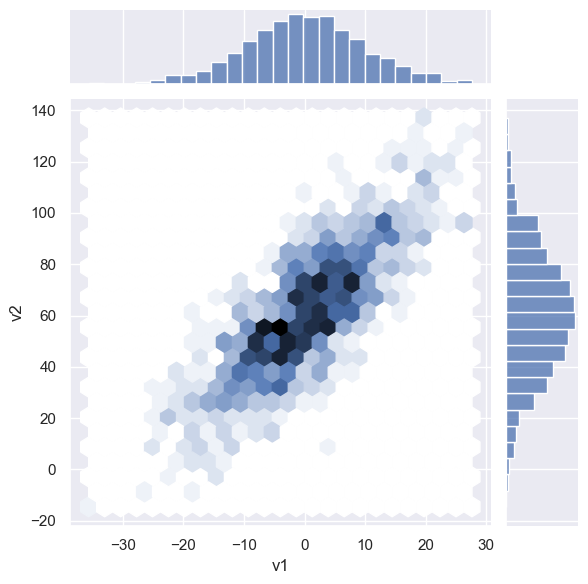

In [37]:
sns.jointplot(x=v1,y=v2,kind='hex');

First, let's tell Seaborn to use a different style using sns.set_style('white').

All of the following charts will have the gray grid turned off.

Now we'll create a joint plot just like before, except this time, let's set the kind to kde.

Finally, let's space to 0, which will plot the marginal distributions directly on the border of the scatter plot. We can see that Seaborn has some built-in options for easy customization. And provides us with easy to create and beautiful plots for exploring the distributions of your data.

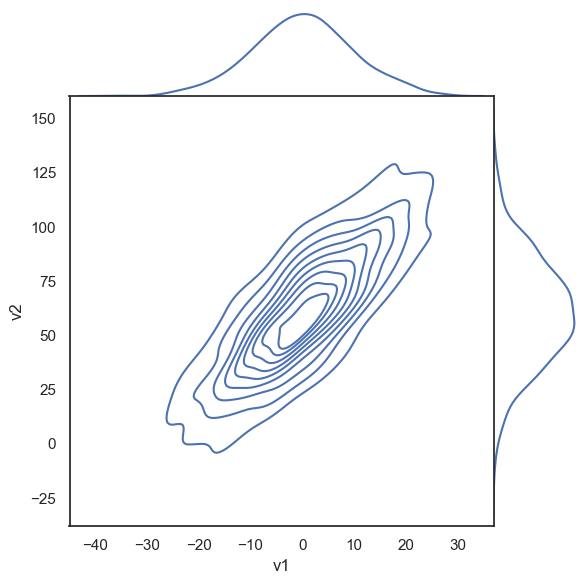

In [42]:
# set the seaborn style for the following plots
sns.set_style('white')

sns.jointplot(x=v1,y=v2,kind='kde',space=0);

For the last part of this tutorial, let's load in the iris dataset, to see how Seaborn handles visualizations of categorical data.
Similar to pandas, Seaborn has a built in function that creates a scatterplot matrix.

We pass in the iris data of frame

In [43]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Tell it to map name to different colors using the hue parameter.

And tell it to use a kde along the diagonals instead of the default histograms.

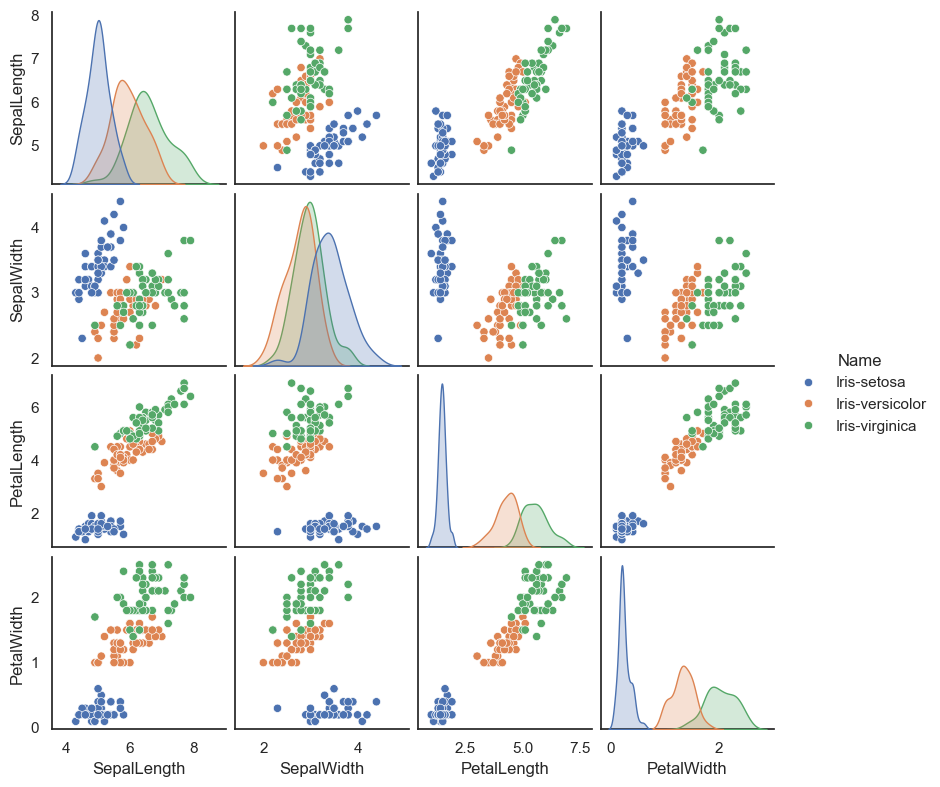

In [50]:
sns.pairplot(iris,hue='Name',diag_kind='kde',height=2);

Looking at the pair plot, it's clear there are some clusters in the data set. It looks like petal length and petal width are good options for separating the observations, whereas width is not a strong separator.

Using pair plot to look at your data frame can be a very useful tool in exploratory data analysis. One final plot I'd like to show you is called the violin plot.

You can think of a violin plot as a more informative version of a box plot.

To demonstrate, let's plot a violin plot next to a swarm plot, which you can think of as a scatter plot for categorical data. First let's create a new figure and a subplot. Next, we'll create the swarmplot, passing in Name and PetalLength, and the data, which is the iris data frame. For the next subplot, we'll create the violinplot, again passing in Name, PetalLength and the iris data frame.

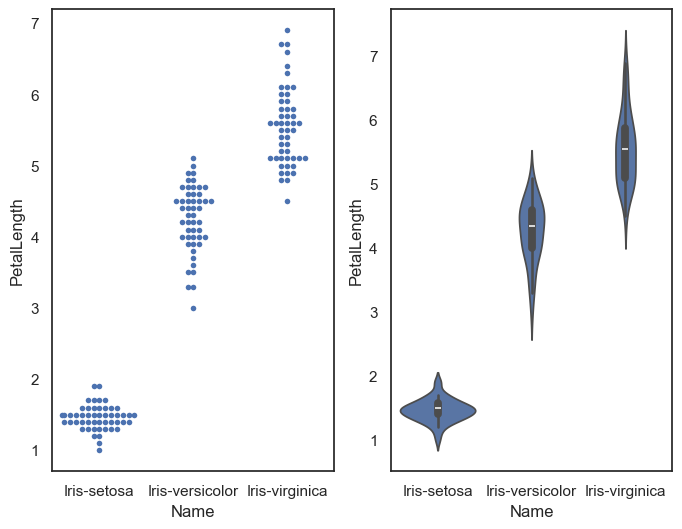

In [52]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot(x='Name',y='PetalLength',data=iris,size=4);
plt.subplot(122)
sns.violinplot(x='Name',y='PetalLength',data=iris);

Looking at the swarmplot, each species has its own column and each observation's petal length is shown. With more common values appearing as the wide parts of the cluster, much like a histogram.

The violinplot is like box plot with a rotated kernel density estimation on each side.

Violin plots convey more information than box plots and are able to show particular phenomena within the distribution that box plots are unable to convey such as multi modality. Seaborn is a library that not only adds new styles and visual aspects. But also introduces new functionality such as joint plots, scatter matrix plots, and violin plots.

Seaborn is being actively developed, and is easy to install, which makes it an indispensible part of a data scientist's toolkit. But keep in mind, this is functionality built on top of matplotlib, and these are largely matplotlib artists being used. So, if you have any ideas for a new statistical visualization, or you've read about one in a publication or journal. You should have the ability to create your own visualization toolkits.